# import data

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
import pandas as pd 
import numpy as np

train = pd.read_csv('assign3_students_train.txt',header= None, sep = '\t')
test = pd.read_csv('assign3_students_test.txt',header= None, sep = '\t')
train.columns=['school', 'sex', 'age', 'address','familySize','cohabitation','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime'
                            ,'studytime','failures','edusupport','nursery','higher','internet','romantic','famrel','freetime','goout',
                            'Dalc','Walc','health','absences','G3']
test.columns=['school', 'sex', 'age', 'address','familySize','cohabitation','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime'
                            ,'studytime','failures','edusupport','nursery','higher','internet','romantic','famrel','freetime','goout',
                            'Dalc','Walc','health','absences','G3']


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        585 non-null    object
 1   sex           585 non-null    object
 2   age           585 non-null    int64 
 3   address       585 non-null    object
 4   familySize    585 non-null    object
 5   cohabitation  585 non-null    object
 6   Medu          585 non-null    int64 
 7   Fedu          585 non-null    int64 
 8   Mjob          585 non-null    object
 9   Fjob          585 non-null    object
 10  reason        585 non-null    object
 11  guardian      585 non-null    object
 12  traveltime    585 non-null    int64 
 13  studytime     585 non-null    int64 
 14  failures      585 non-null    int64 
 15  edusupport    585 non-null    object
 16  nursery       585 non-null    object
 17  higher        585 non-null    object
 18  internet      585 non-null    object
 19  romantic

In [200]:
test

,school,sex,age,address,familySize,cohabitation,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,edusupport,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,F,17,R,LE3,A,3,1,other,at_home,course,other,2,3,0,family paid,yes,no,no,no,4,2,3,2,2,3,5,8
1,MS,F,17,U,GT3,T,4,2,teacher,services,home,mother,1,2,0,school family,yes,yes,yes,no,5,5,5,1,3,5,0,0
2,MS,F,18,R,LE3,T,2,2,services,services,course,mother,1,2,1,family,yes,yes,yes,no,2,3,3,1,2,4,3,8
3,MS,F,17,U,GT3,T,4,1,health,at_home,course,mother,1,1,0,family,yes,yes,no,yes,3,2,2,1,1,5,0,9
4,MS,F,17,U,LE3,T,1,2,at_home,other,course,father,1,1,0,no,yes,yes,yes,no,5,5,1,1,1,3,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,yes,yes,no,5,4,2,1,2,5,4,10
60,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,family,yes,yes,yes,no,4,3,4,1,1,1,4,16
61,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,yes,yes,no,no,1,1,1,1,1,5,6,9
62,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,yes,yes,no,2,4,5,3,4,2,6,10


In [20]:
print(train.head())
train.nunique()

  school sex  age address familySize  ... Dalc  Walc  health absences  G3
0     GP   F   18       U        GT3  ...    1     1       3        4  11
1     GP   F   17       U        GT3  ...    1     1       3        2  11
2     GP   F   15       U        LE3  ...    2     3       3        6  12
3     GP   F   15       U        GT3  ...    1     1       5        0  14
4     GP   F   16       U        GT3  ...    1     2       5        0  13

[5 rows x 28 columns]


school           2
sex              2
age              8
address          2
familySize       2
cohabitation     2
Medu             5
Fedu             5
Mjob             5
Fjob             5
reason           4
guardian         3
traveltime       4
studytime        4
failures         4
edusupport       8
nursery          2
higher           2
internet         2
romantic         2
famrel           5
freetime         5
goout            5
Dalc             5
Walc             5
health           5
absences        24
G3              17
dtype: int64

In [22]:
print(test.head())
test.nunique()

  school sex  age address familySize  ... Dalc  Walc  health absences  G3
0     MS   F   17       R        LE3  ...    2     2       3        5   8
1     MS   F   17       U        GT3  ...    1     3       5        0   0
2     MS   F   18       R        LE3  ...    1     2       4        3   8
3     MS   F   17       U        GT3  ...    1     1       5        0   9
4     MS   F   17       U        LE3  ...    1     1       3        0  10

[5 rows x 28 columns]


school           1
sex              2
age              3
address          2
familySize       2
cohabitation     2
Medu             4
Fedu             4
Mjob             5
Fjob             4
reason           4
guardian         3
traveltime       4
studytime        4
failures         4
edusupport       5
nursery          2
higher           2
internet         2
romantic         2
famrel           5
freetime         5
goout            5
Dalc             5
Walc             5
health           5
absences         9
G3              14
dtype: int64

**in the training data, half of data type is `object`, and half of them are `int`**

# data exploration
**there are three tasks in this assignment, which try to pridict `grade--G3`(int), `Mother's job--mjob`(object) and `educational support --edusupport`(object)**

So first, evaluate the labels' distribution in the training and testing dataset

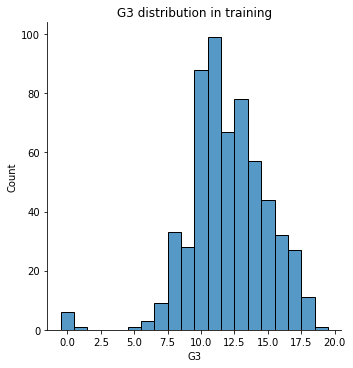

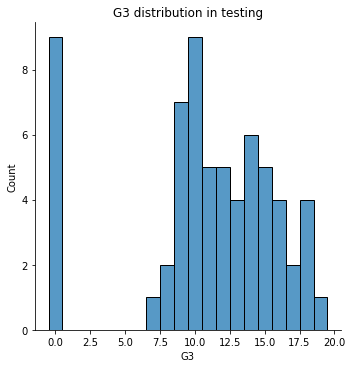

In [33]:
sns.displot(data = train.G3,discrete = True)
plt.title("G3 distribution in training")
plt.show()
sns.displot(data = test.G3,discrete = True)
plt.title("G3 distribution in testing")
plt.show()

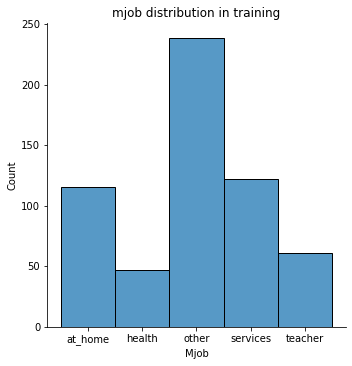

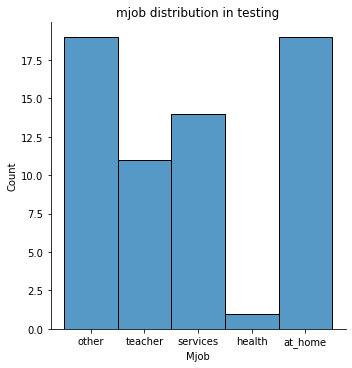

In [37]:
sns.displot(data = train.Mjob,discrete = True)
plt.title("mjob distribution in training")
plt.show()
sns.displot(data = test.Mjob,discrete = True)
plt.title("mjob distribution in testing")
plt.show()

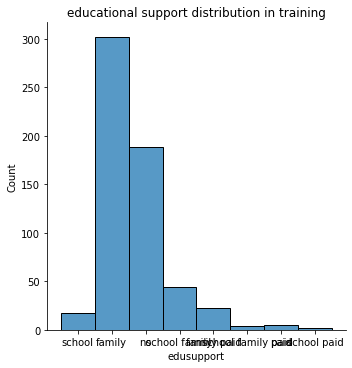

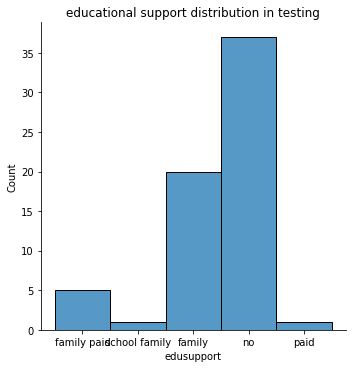

In [38]:
sns.displot(data = train.edusupport,discrete = True)
plt.title("educational support distribution in training")
plt.show()
sns.displot(data = test.edusupport,discrete = True)
plt.title("educational support distribution in testing")
plt.show()

## subtask -- G3
### initializing from `int` data 

(585, 14)


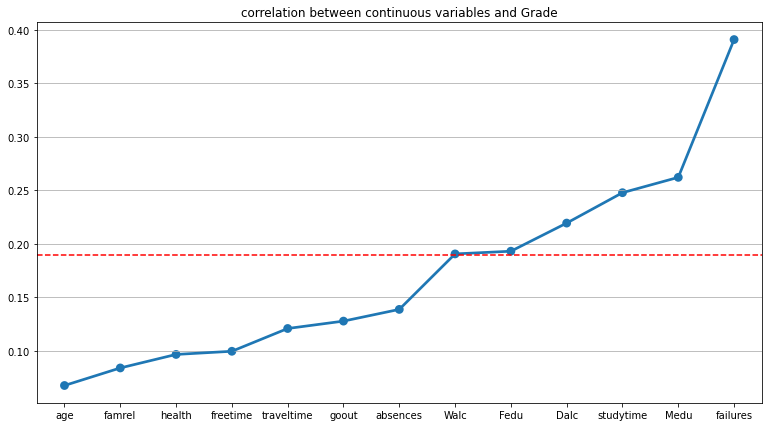

In [97]:
print(train.select_dtypes('number').shape)
tem = train.select_dtypes('number').corr().iloc[13,:]
tem = abs(train.select_dtypes('number').corr().iloc[13,:13]).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(13, 7))
plt.grid()
plt.title('correlation between continuous variables and Grade')
ax = sns.pointplot(x=list(tem.index), y=(tem.values),
                   markers=["o"],
                   linestyles=["-"],aspect = 2)
plt.axhline(y=0.19, color='r', linestyle='--')
plt.show()


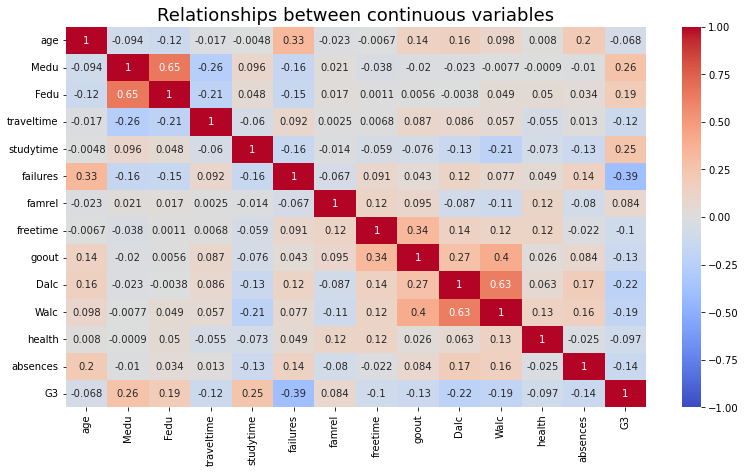

In [64]:
fig, ax = plt.subplots(figsize=(13, 7))

sns.heatmap(data = train.select_dtypes('number').corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax,annot=True)
plt.title ('Relationships between continuous variables',fontsize=18)
plt.show()

therefor, for numerical data, I use `Dacl`,`Fedu`,`Medu`,`studytime` and `failure`   
**for testing data**

(64, 14)


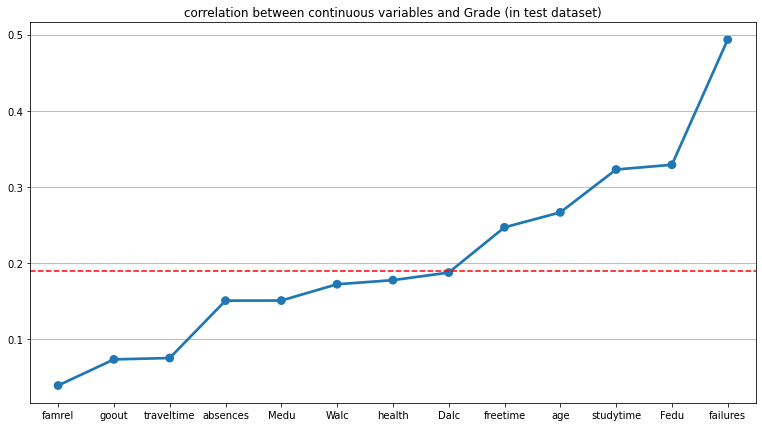

In [98]:
print(test.select_dtypes('number').shape)
tem = test.select_dtypes('number').corr().iloc[13,:]
tem = abs(test.select_dtypes('number').corr().iloc[13,:13]).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(13, 7))
plt.grid()
plt.title('correlation between continuous variables and Grade (in test dataset)')
ax = sns.pointplot(x=list(tem.index), y=(tem.values),
                   markers=["o"],
                   linestyles=["-"],aspect = 2)
plt.axhline(y=0.19, color='r', linestyle='--')
plt.show()

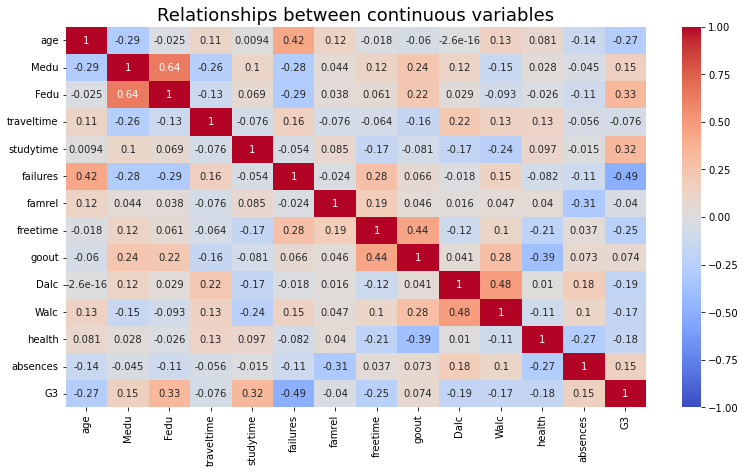

In [72]:
fig, ax = plt.subplots(figsize=(13, 7))

sns.heatmap(data = test.select_dtypes('number').corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax,annot=True)
plt.title ('Relationships between continuous variables',fontsize=18)
plt.show()

### for categorical data

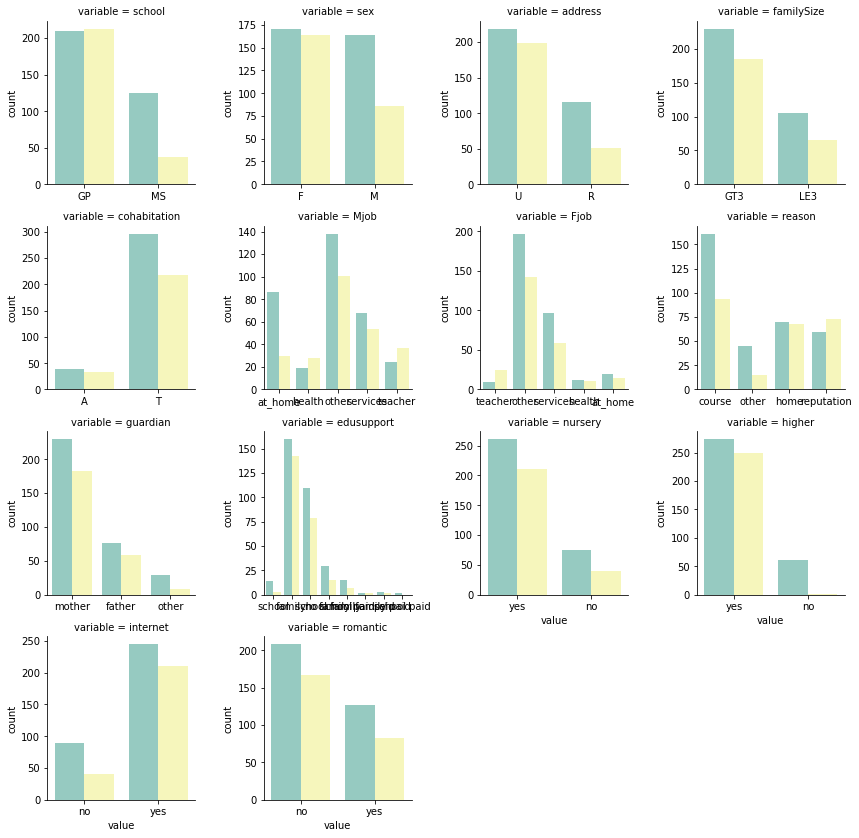

In [70]:
C_features = train.select_dtypes('object').copy().columns
C_features
lf_C = train.melt( id_vars=['G3'],value_vars=C_features, ignore_index=True)
lf_C.head()
avg_G3  = np.mean(train.G3)
lf_C['above'] = [1 if i>=avg_G3 else 0 for i in lf_C.G3  ]
lf_C
g = sns.FacetGrid(data = lf_C, col='variable', col_wrap=4,sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x='value',hue = 'above',palette="Set3")
g.fig.subplots_adjust(top=0.95)
# g.fig.suptitle('Distributions of continuous variables',fontsize= 25)
plt.show()

from the histogram above, some categorical variables do have more impact in grade than the others.
So there, I decide use `school`, `sex`, `address`, `cohabitation`, `mjob`, `fjob`, `reason`,`higher`.    

dive deeper, is there relationship between `school` and `reason`,`higher` 

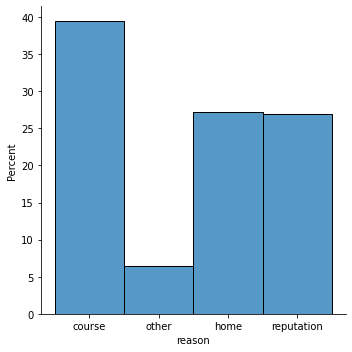

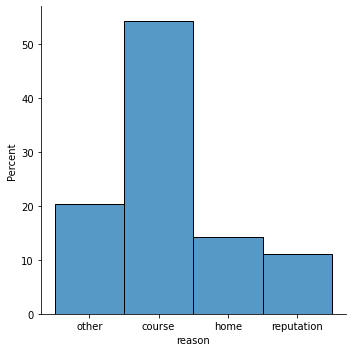

In [80]:
school_gp = train[train.school=='GP']
school_MS=train[train.school=='MS']

sns.displot(data=school_gp,x = 'reason' ,stat='percent')
plt.show()
sns.displot(data=school_MS,x = 'reason',stat='percent' )
plt.show()

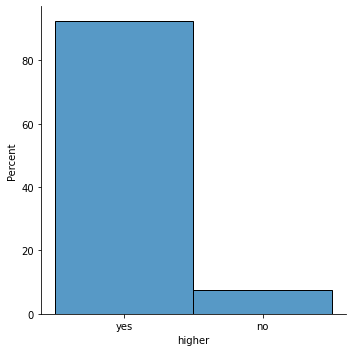

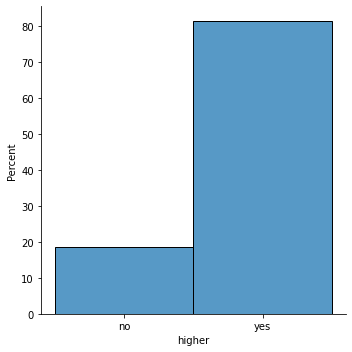

In [84]:
school_gp = train[train.school=='GP']
school_MS=train[train.school=='MS']

sns.displot(data=school_gp,x = 'higher' ,stat='percent')
plt.show()
sns.displot(data=school_MS,x = 'higher',stat='percent' )
plt.show()

**From here, the school factor which that impact grade in the training set, which may be triggered by the `higher` factor.**    
**analysis `reason` factor, the proportions of `repution` and `home` between different two school are different, and these difference may be the real essence of the difference grades of students in those two schools.**

Therefore, finally, I will use `address`, `sex`(?), `fjob`, `mjob`, `reason` and `higher` as my factors for the prediction task.

for  testing dataset

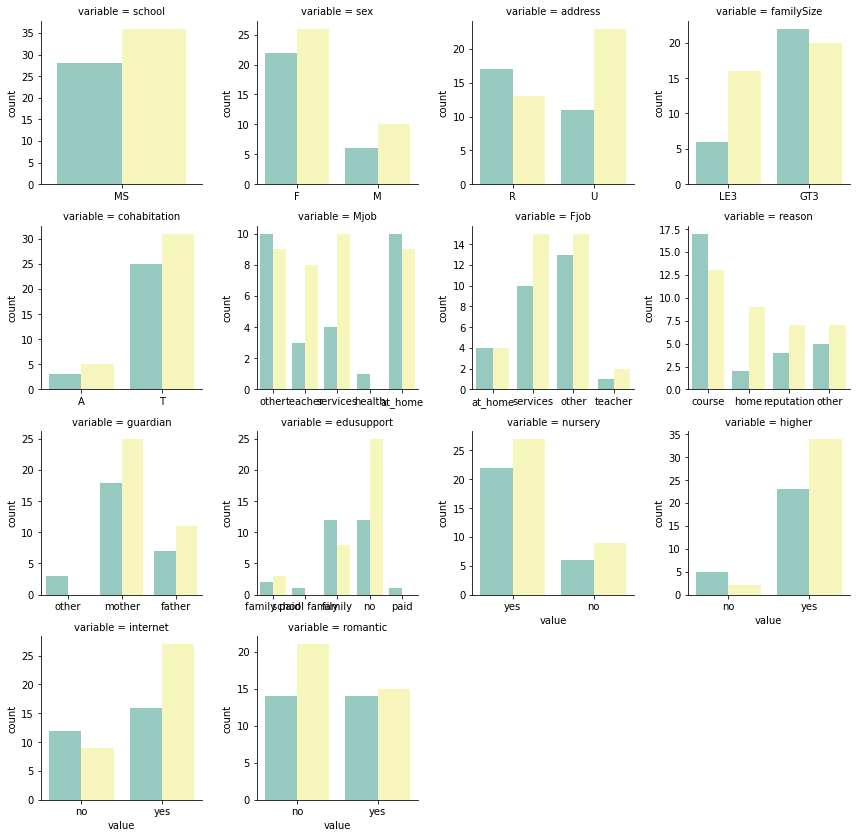

In [83]:
C_features = test.select_dtypes('object').copy().columns
C_features
lf_C = test.melt( id_vars=['G3'],value_vars=C_features, ignore_index=True)
lf_C.head()
avg_G3  = np.mean(test.G3)
lf_C['above'] = [1 if i>=avg_G3 else 0 for i in lf_C.G3  ]
lf_C
g = sns.FacetGrid(data = lf_C, col='variable', col_wrap=4,sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x='value',hue = 'above',palette="Set3")
g.fig.subplots_adjust(top=0.95)
# g.fig.suptitle('Distributions of continuous variables',fontsize= 25)
plt.show()

**From the visualization of testing data, some of variable have different data distribuition than ones in training data. this phenomenon or say difference will increase the difficulty of prediction in testing data.**  

**therefore, how to choose feature is the vital step in this subtask.**

### summary

so after the data exploration section above, I will use `Dacl`,`Fedu`,`Medu`,`studytime` and `failure`, and for categorical data, I use `address`, `sex(?)`, `fjob`, `mjob`, `reason` and `higher`

numerical data preprocessing

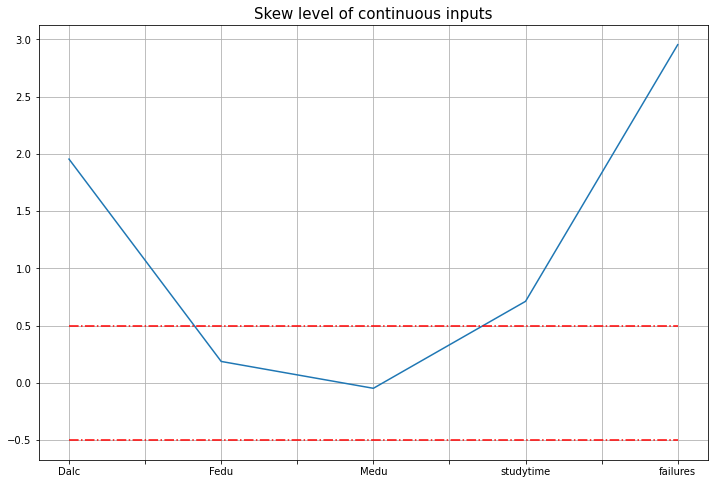

In [109]:
fig, ax = plt.subplots(figsize=(12, 8))
num_f = ['Dalc','Fedu','Medu','studytime', 'failures']
train[num_f]
skew = []
for i,j in enumerate(abs(train[num_f].skew())>1):
    if j==True:
        skew.append((train[num_f].columns)[i])
# print(skew)
data_copy = train.copy()
for i in skew:
    data_copy[i] = train[i]+10
    data_copy[i] = np.log( data_copy[i])

# data.select_dtypes('number').skew().plot(ax=ax)
# print(data_copy.select_dtypes('number').skew())
data_copy[num_f].skew().plot(ax=ax)
plt.hlines(y=0.5,xmin = 0, xmax= 4,color = 'r',linestyles = '-.')
plt.hlines(y=-0.5,xmin = 0, xmax= 4,color = 'r',linestyles = '-.')
plt.title('Skew level of continuous inputs',fontsize = 15)

plt.grid()

plt.show()

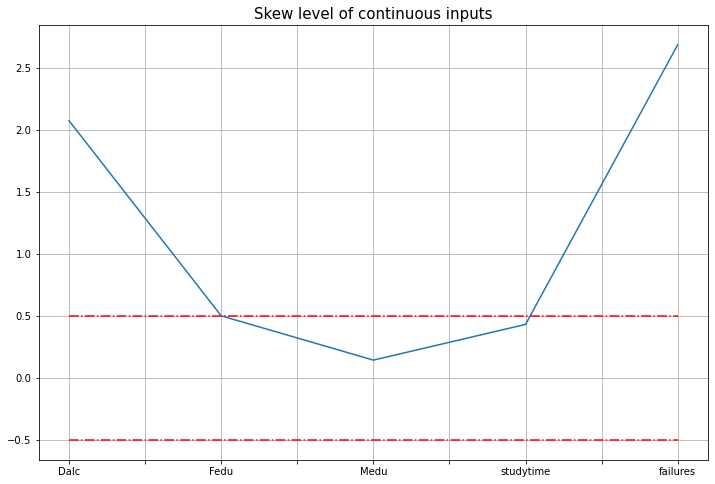

In [112]:
fig, ax = plt.subplots(figsize=(12, 8))

skew = []
for i,j in enumerate(abs(test[num_f].skew())>1):
    if j==True:
        skew.append((test[num_f].columns)[i])

data_copy = test.copy()
for i in skew:
    data_copy[i] = test[i]+10
    data_copy[i] = np.log( data_copy[i])

# data.select_dtypes('number').skew().plot(ax=ax)

data_copy[num_f].skew().plot(ax=ax)
plt.hlines(y=0.5,xmin = 0, xmax= 4,color = 'r',linestyles = '-.')
plt.hlines(y=-0.5,xmin = 0, xmax= 4,color = 'r',linestyles = '-.')
plt.title('Skew level of continuous inputs',fontsize = 15)

plt.grid()

plt.show()

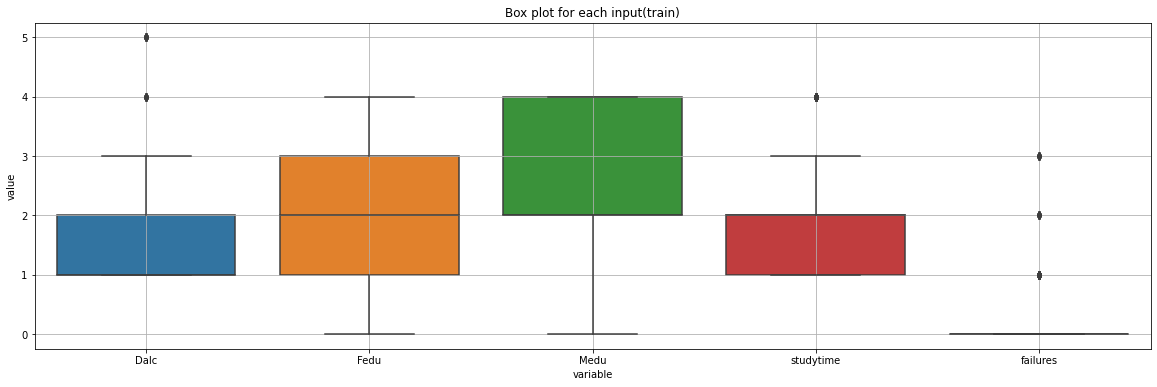

In [117]:
fig,ax = plt.subplots(figsize = (20,6))

lf =train.melt( id_vars=['G3'], value_vars=num_f, ignore_index=True)
lf

sns.boxplot(data = lf, x='variable', y='value')
ax.set_title('Box plot for each input(train)')
plt.grid()
plt.show()

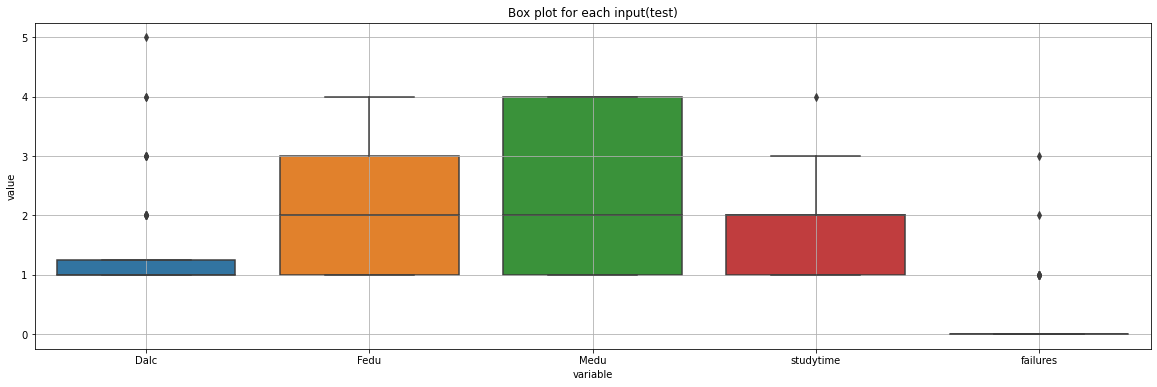

In [116]:
fig,ax = plt.subplots(figsize = (20,6))

lf =test.melt( id_vars=['G3'], value_vars=num_f, ignore_index=True)
lf

sns.boxplot(data = lf, x='variable', y='value')
ax.set_title('Box plot for each input(test)')
plt.grid()
plt.show()

**from here, we can see failures is a skewed data, therefore, I do some transformation in this variable.**


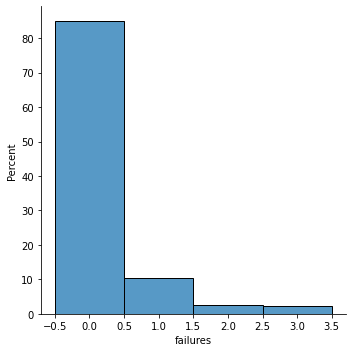

In [133]:
sns.displot(data = train, x = 'failures',discrete = True,stat='percent')
plt.show()

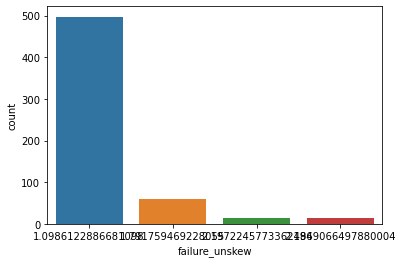

In [143]:
train['failure_unskew'] = np.log((train.failures+1)*3)
sns.countplot(data = train, x = 'failure_unskew')
plt.show()

In [138]:
train.failures.value_counts()

0    497
1     60
2     15
3     13
Name: failures, dtype: int64

## sub_task----mother's job

In [181]:
train_num = train.select_dtypes('number')
train_num_m =train_num.copy()
train_num_m['mjob'] = train.Mjob
train_num_m


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,mjob
0,18,4,4,2,2,0,4,3,4,1,1,3,4,11,at_home
1,17,1,1,1,2,0,5,3,3,1,1,3,2,11,at_home
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,at_home
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,health
4,16,3,3,1,2,0,4,3,2,1,2,5,0,13,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,19,1,1,3,1,1,4,4,4,3,3,5,4,10,other
581,18,1,2,2,2,2,4,3,3,1,1,5,2,8,at_home
582,19,1,1,1,1,0,1,4,4,1,1,5,0,7,at_home
583,18,2,2,2,1,1,5,5,5,1,1,3,0,0,other


In [182]:
train_num_m_l=train_num_m.melt( id_vars=['mjob'], ignore_index=True)
train_num_m_l

,mjob,variable,value
0,at_home,age,18
1,at_home,age,17
2,at_home,age,15
3,health,age,15
4,other,age,16
...,...,...,...
8185,other,G3,10
8186,at_home,G3,8
8187,at_home,G3,7
8188,other,G3,0


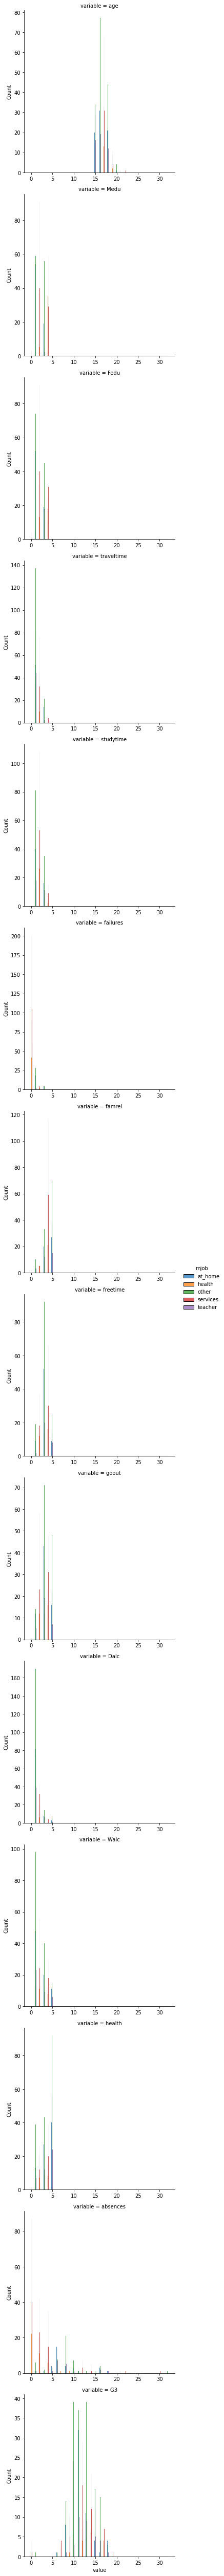

In [183]:
sns.displot(data = train_num_m_l,hue = 'mjob', x= 'value',row='variable',multiple="dodge",
            facet_kws=dict(sharey=False,sharex = False))
plt.show()

In [184]:
mjob_map = {}
for i,j in enumerate(dict(train_num_m['mjob'].value_counts())):
    mjob_map[j]=i
mjob_map
mjob_list = []
for i in train_num_m['mjob']:
    mjob_list.append(mjob_map[i])
train_num_m['mjob'] = mjob_list
train_num_m



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,mjob
0,18,4,4,2,2,0,4,3,4,1,1,3,4,11,2
1,17,1,1,1,2,0,5,3,3,1,1,3,2,11,2
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,2
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,4
4,16,3,3,1,2,0,4,3,2,1,2,5,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,19,1,1,3,1,1,4,4,4,3,3,5,4,10,0
581,18,1,2,2,2,2,4,3,3,1,1,5,2,8,2
582,19,1,1,1,1,0,1,4,4,1,1,5,0,7,2
583,18,2,2,2,1,1,5,5,5,1,1,3,0,0,0


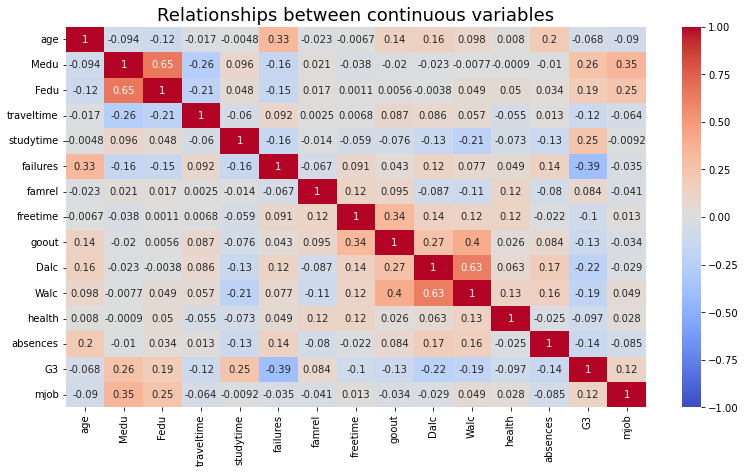

In [185]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.heatmap(data = train_num_m.corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax,annot=True)
plt.title ('Relationships between continuous variables',fontsize=18)
plt.show()

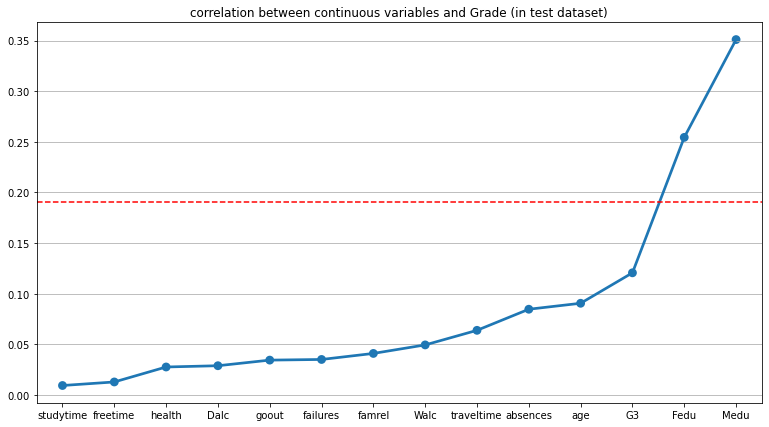

In [186]:

tem = train_num_m.corr().iloc[14,:]
tem = abs(train_num_m.corr().iloc[14,:14]).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(13, 7))
plt.grid()
plt.title('correlation between continuous variables and Grade (in test dataset)')
ax = sns.pointplot(x=list(tem.index), y=(tem.values),
                   markers=["o"],
                   linestyles=["-"],aspect = 2)
plt.axhline(y=0.19, color='r', linestyle='--')
plt.show()

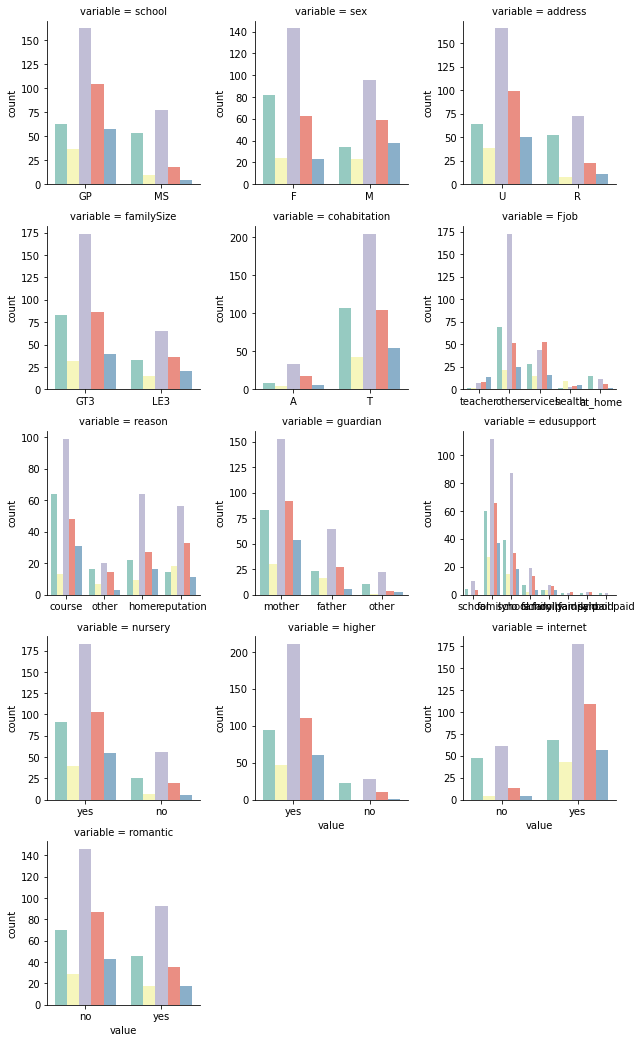

In [192]:
C_features = train.select_dtypes('object').copy().columns
C_features
lf_C = train.melt( id_vars=['Mjob'],value_vars=C_features, ignore_index=True)
lf_C.head()

lf_C
g = sns.FacetGrid(data = lf_C, col='variable', col_wrap=3,sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x='value',hue = 'Mjob',palette="Set3")
g.fig.subplots_adjust(top=0.95)
# g.fig.suptitle('Distributions of continuous variables',fontsize= 25)
plt.show()

testing

In [187]:
test_num =test.select_dtypes('number')
test_num_m =test_num.copy()
test_num_m['mjob'] = test.Mjob
test_num_m

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,mjob
0,17,3,1,2,3,0,4,2,3,2,2,3,5,8,other
1,17,4,2,1,2,0,5,5,5,1,3,5,0,0,teacher
2,18,2,2,1,2,1,2,3,3,1,2,4,3,8,services
3,17,4,1,1,1,0,3,2,2,1,1,5,0,9,health
4,17,1,2,1,1,0,5,5,1,1,1,3,0,10,at_home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,19,2,3,1,3,1,5,4,2,1,2,5,4,10,services
60,18,3,1,1,2,0,4,3,4,1,1,1,4,16,teacher
61,18,1,1,2,2,0,1,1,1,1,1,5,6,9,other
62,17,3,1,2,1,0,2,4,5,3,4,2,6,10,services


In [188]:
mjob_list = []
for i in test_num_m['mjob']:
    mjob_list.append(mjob_map[i])
test_num_m['mjob'] = mjob_list
test_num_m

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,mjob
0,17,3,1,2,3,0,4,2,3,2,2,3,5,8,0
1,17,4,2,1,2,0,5,5,5,1,3,5,0,0,3
2,18,2,2,1,2,1,2,3,3,1,2,4,3,8,1
3,17,4,1,1,1,0,3,2,2,1,1,5,0,9,4
4,17,1,2,1,1,0,5,5,1,1,1,3,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,19,2,3,1,3,1,5,4,2,1,2,5,4,10,1
60,18,3,1,1,2,0,4,3,4,1,1,1,4,16,3
61,18,1,1,2,2,0,1,1,1,1,1,5,6,9,0
62,17,3,1,2,1,0,2,4,5,3,4,2,6,10,1


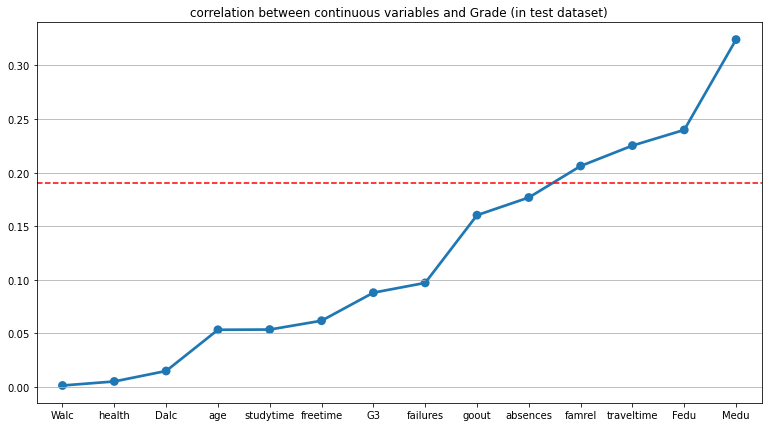

In [189]:
tem = test_num_m.corr().iloc[14,:]
tem = abs(test_num_m.corr().iloc[14,:14]).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(13, 7))
plt.grid()
plt.title('correlation between continuous variables and Grade (in test dataset)')
ax = sns.pointplot(x=list(tem.index), y=(tem.values),
                   markers=["o"],
                   linestyles=["-"],aspect = 2)
plt.axhline(y=0.19, color='r', linestyle='--')
plt.show()

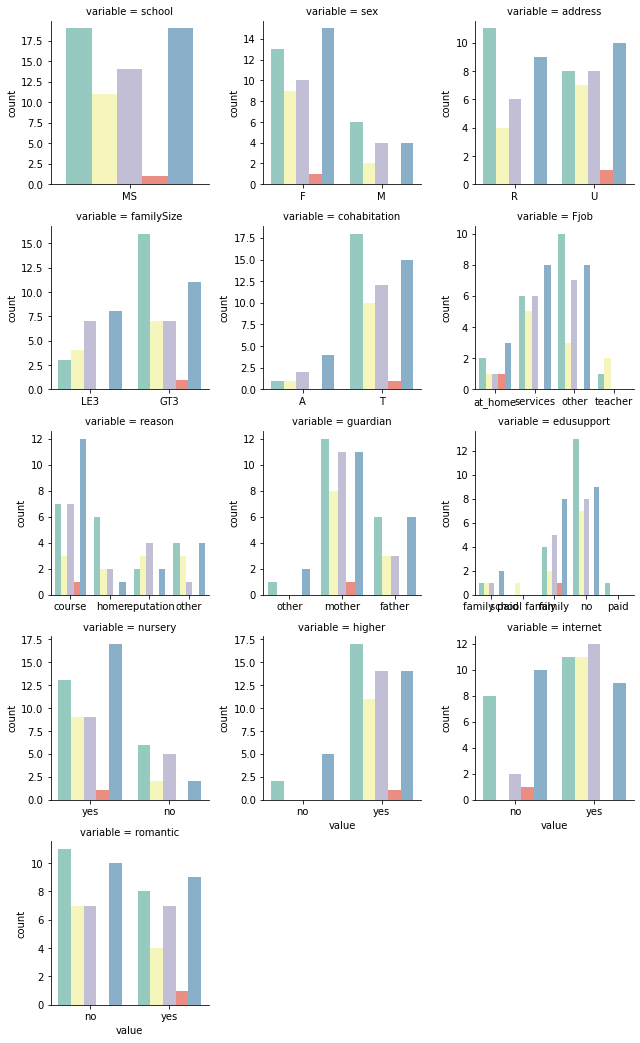

In [198]:
C_features = test.select_dtypes('object').copy().columns
C_features
lf_C = test.melt( id_vars=['Mjob'],value_vars=C_features, ignore_index=True)
lf_C.head()

lf_C
g = sns.FacetGrid(data = lf_C, col='variable', col_wrap=3,sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x='value',hue = 'Mjob',palette="Set3")
g.fig.subplots_adjust(top=0.95)
# g.fig.suptitle('Distributions of continuous variables',fontsize= 25)
plt.show()

## sub task 3 -- edusupport

In [206]:
test.edusupport
a = list(train.edusupport)
a

['school',
 'family',
 'school',
 'family',
 'family',
 'family',
 'no',
 'school family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'school family',
 'family paid',
 'no',
 'no',
 'family paid',
 'no',
 'family',
 'school family',
 'family',
 'family',
 'no',
 'school family paid',
 'family paid',
 'family paid',
 'family',
 'family',
 'no',
 'family',
 'family',
 'family',
 'family',
 'school family',
 'school family',
 'family',
 'family',
 'family',
 'school family',
 'school',
 'school family paid',
 'family',
 'no',
 'family',
 'school family',
 'family',
 'family',
 'no',
 'school family',
 'no',
 'no',
 'family',
 'family',
 'school family',
 'family paid',
 'family',
 'school family',
 'school',
 'school family',
 'school',
 'family',
 'family',
 'school family',
 'school family',
 'family',
 'family',
 'no',
 'school family',
 'no',
 'school family',
 'family',
 'no',
 'no',
 'school family',
 'family',
 'school family